In [1]:
import yfinance as yf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
btc_ticker = yf.Ticker("BTC-USD")

In [3]:
btc = btc_ticker.history(period="max")

In [4]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-18 00:00:00+00:00,61275.316406,64125.687500,60833.480469,63512.753906,36006307335,0.0,0.0
2024-04-19 00:00:00+00:00,63510.750000,65481.597656,59651.390625,63843.570312,49920425401,0.0,0.0
2024-04-20 00:00:00+00:00,63851.101562,65442.457031,63172.402344,64994.441406,23097485495,0.0,0.0


In [5]:
btc.index = pd.to_datetime(btc.index)

In [6]:
del btc["Dividends"]
del btc["Stock Splits"]

In [7]:
btc.columns = [c.lower() for c in btc.columns]

<Axes: xlabel='Date'>

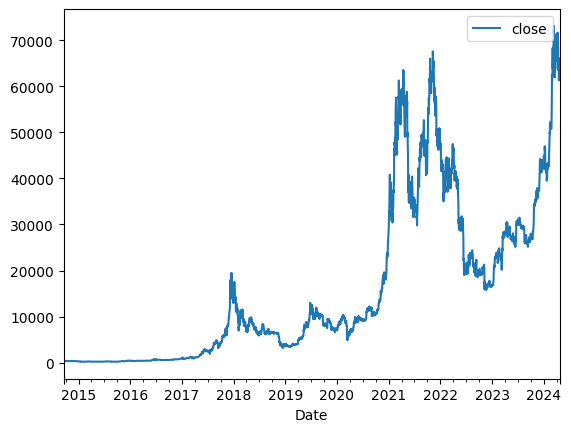

In [8]:
btc.plot.line(y="close", use_index=True)

In [9]:
bitcoin_wiki = pd.read_csv("wikipedia_edits_bitcoin.csv", index_col=0, parse_dates=True)

In [10]:
bitcoin_wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2024-04-18,0.200000,-0.091111,0.116667
2024-04-19,0.200000,-0.091111,0.116667
2024-04-20,0.233333,-0.122229,0.150000
2024-04-21,0.300000,-0.155494,0.183333


In [11]:
btc = btc.tz_localize(None)
bitcoin_wiki = bitcoin_wiki.tz_localize(None)

In [12]:
btc = btc.merge(bitcoin_wiki, left_index=True, right_index=True)

In [13]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718
...,...,...,...,...,...,...,...,...
2024-04-18,61275.316406,64125.687500,60833.480469,63512.753906,36006307335,0.200000,-0.091111,0.116667
2024-04-19,63510.750000,65481.597656,59651.390625,63843.570312,49920425401,0.200000,-0.091111,0.116667
2024-04-20,63851.101562,65442.457031,63172.402344,64994.441406,23097485495,0.233333,-0.122229,0.150000
2024-04-21,64992.816406,65723.242188,64277.722656,64926.644531,20506644853,0.300000,-0.155494,0.183333


In [14]:
btc["tomorrow"] = btc["close"].shift(-1)

In [15]:
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)

In [16]:
btc["target"].value_counts()

target
1    1860
0    1646
Name: count, dtype: int64

In [17]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1
...,...,...,...,...,...,...,...,...,...,...
2024-04-18,61275.316406,64125.687500,60833.480469,63512.753906,36006307335,0.200000,-0.091111,0.116667,63843.570312,1
2024-04-19,63510.750000,65481.597656,59651.390625,63843.570312,49920425401,0.200000,-0.091111,0.116667,64994.441406,1
2024-04-20,63851.101562,65442.457031,63172.402344,64994.441406,23097485495,0.233333,-0.122229,0.150000,64926.644531,0
2024-04-21,64992.816406,65723.242188,64277.722656,64926.644531,20506644853,0.300000,-0.155494,0.183333,65995.726562,1


### Realtive Strength Index
The relative strength index (RSI) is a momentum indicator used in technical analysis. RSI measures the speed and magnitude of a security's recent price changes to evaluate overvalued or undervalued conditions in the price of that security.

The RSI can do more than point to overbought and oversold securities. It can also indicate securities that may be primed for a trend reversal or corrective pullback in price. It can signal when to buy and sell. Traditionally, an RSI reading of 70 or above indicates an overbought situation. A reading of 30 or below indicates an oversold condition.

As a momentum indicator, the relative strength index compares a security's strength on days when prices go up to its strength on days when prices go down. Relating the result of this comparison to price action can give traders an idea of how a security may perform. The RSI, used in conjunction with other technical indicators, can help traders make better-informed trading decisions.

In [18]:
# Define the period for RSI calculation
rsi_period = 14

# Calculate price differences
delta = btc['close'].diff()

# Separate positive and negative price changes
gain = (delta.where(delta > 0, 0)).rolling(window=rsi_period).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=rsi_period).mean()

# Calculate Relative Strength (RS)
rs = gain / loss

# Calculate RSI
rsi = 100 - (100 / (1 + rs))

In [19]:
# Add RSI as a new column to your DataFrame
btc['RSI'] = rsi

### Stochastic RSI

The Stochastic RSI indicator (Stoch RSI) is basically an indicator of an indicator. It is used in technical analysis for a stochastic calculation of the RSI indicator. It provides a measurement of the RSI relative to its high/low range for a user-defined time period. The Stochastic RSI is an oscillator that calculates a value between 0 and 1 and plots it as a line. This indicator is primarily used in determining overbought and oversold conditions.

The RSI is one step away from the price and therefore a stochastic calculation of the RSI is two steps away. This is important because with an indicator set several steps from the actual price, there may be short separations between the indicator and the actual price. However, the main function of the Stoch RSI is to identify crossovers and overbought/oversold conditions.

In [20]:
# Define the period for Stochastic RSI calculation
stoch_period = 14

# Calculate Stochastic RSI
rsi_min = rsi.rolling(window=stoch_period).min()
rsi_max = rsi.rolling(window=stoch_period).max()
stoch_rsi = (rsi - rsi_min) / (rsi_max - rsi_min)

In [21]:
# Add Stochastic RSI as a new column to your DataFrame
btc['Stoch_RSI'] = stoch_rsi

### Simple Moving Average (SMA)

The simple moving average is a lagging indicator because it is based on past price data. The longer the time period of the SMA, the greater the lag. While the SMA is a helpful technical analysis tool, it is best used along with other popular indicators such as trendlines and volume analysis.

In most trading scenarios, the SMA is plotted on a price chart along with the exponential moving average (EMA). They share similarities and differences but, like most technical indicators, they work best together to define price trends and momentum in trading.

The simple moving average is quite easy to calculate. Most trading platforms offer tools that can automatically calculate the SMA. This means that traders will almost never have to manually calculate the SMA for their trades as modern charting software will perform all the calculations instantly. However, the below formula is good for a trader's general knowledge.

In [22]:
# Define the period of 9 days for SMA calculation
period_9SMA = 9

# Calculate Simple Moving Average (SMA) for 9 days
sma_9d = btc['close'].rolling(window=period_9SMA).mean()

# Add SMA (9 days) as a new column to your DataFrame
btc['SMA(9)'] = sma_9d

# Define the period of 14 days for SMA calculation
period_14SMA = 14

# Calculate Simple Moving Average (SMA) for 14 days
sma_14d = btc['close'].rolling(window=period_14SMA).mean()

# Add SMA (14 days) as a new column to your DataFrame
btc['SMA(14)'] = sma_14d

### Exponential Moving Average (EMA)

Using the EMA in trading means that it adapts more quickly to changes in price action, which is an advantage over the simple moving average. As more weight is given to the recent price data and less to that which occurred earlier in the trading day, this makes it more sensitive to any change in price data and, theoretically, better for understanding in which direction the price may head next.

The exponential moving average therefore helps to influence traders’ decisions in the exact moment that they place a trade based on the exact price movements, as opposed to what was happening on trading charts​ in the past.

This higher weight of recent price data is useful when analysing volatile markets, where there may be abrupt price changes. It is particularly useful for identifying trends and recent swings on price charts to highlight trading patterns​. It also means that there is less of a lag, as the EMA instead reacts quickly to price changes. Therefore, developing an exponential moving average strategy is great for traders who favour short-term strategies, such as day trading in fast-moving markets.

In [23]:
# Define the period of 7 days for EMA calculation
period_7EMA = 7

# Calculate Exponential Moving Average (EMA) for 7 days
ema_7d = btc['close'].ewm(span=period_7EMA, adjust=False).mean()

# Add EMA (7 days) as a new column to your DataFrame
btc['EMA(7)'] = ema_7d

# Define the period of 25 days for EMA calculation
period_25EMA = 25

# Calculate Exponential Moving Average (EMA) for 25 days
ema_25d = btc['close'].ewm(span=period_25EMA, adjust=False).mean()

# Add EMA (25 days) as a new column to your DataFrame
btc['EMA(25)'] = ema_25d

# Define the period of 99 days for EMA calculation
period_99EMA = 99

# Calculate Exponential Moving Average (EMA) for 99 days
ema_99d = btc['close'].ewm(span=period_99EMA, adjust=False).mean()

# Add EMA (99 days) as a new column to your DataFrame
btc['EMA(99)'] = ema_99d

### Moving Average Convergence/Divergence (MACD)

This is a popular technical analysis tool used by traders to identify trend reversals, momentum shifts, and potential buy or sell signals.

The MACD is calculated by subtracting a 26-period Exponential Moving Average (EMA) from a 12-period EMA. A 9-period EMA, known as a signal line, is then plotted on the MACD to serve as a trigger for potential buy or sell signals.

The MACD is used to measure the difference between the two moving averages and identify when they are converging or diverging . When the MACD line (the difference between the two EMAs) crosses the signal line to the upside, it is considered a bullish signal, indicating that it may be a good time to buy. Conversely, when the MACD line crosses the signal line downwards, it is considered a bearish signal, indicating that it may be a good time to sell.

MACD can also be used to identify potential trend reversals . If the MACD line begins to move in the opposite direction of the trend, it may indicate that the trend is losing momentum and may be about to reverse.

The shorter moving average (12-day) is faster and responsible for most MACD movements. The longer moving average (26-day) is slower and less reactive to price changes in the underlying security.

In [24]:
# Define the periods for short-term and long-term EMAs for MACD calculation.
short_period = 12
long_period = 26
signal_period = 9

# Calculate Short-Term EMA
short_ema = btc['close'].ewm(span=short_period, min_periods=1, adjust=False).mean()

# Calculate Long-Term EMA
long_ema = btc['close'].ewm(span=long_period, min_periods=1, adjust=False).mean()

# Calculate MACD line
macd_line = short_ema - long_ema

# Calculate Signal line (typically a 9-day EMA of MACD)
signal_line = macd_line.ewm(span=signal_period, min_periods=1, adjust=False).mean()

# Calculate MACD Histogram
macd_histogram = macd_line - signal_line

# Add MACD, Signal Line, and MACD Histogram as new columns to your DataFrame
btc['MACD'] = macd_line
btc['Signal Line'] = signal_line
btc['MACD Histogram'] = macd_histogram

In [25]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target,RSI,Stoch_RSI,SMA(9),SMA(14),EMA(7),EMA(25),EMA(99),MACD,Signal Line,MACD Histogram
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0,NaN,NaN,NaN,NaN,457.334015,457.334015,457.334015,0.000000,0.000000,0.000000
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990,0,NaN,NaN,NaN,NaN,449.110512,454.803706,456.676135,-2.624024,-0.524805,-2.099219
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1,NaN,NaN,NaN,NaN,435.531881,450.187728,455.438532,-7.014744,-1.822793,-5.191951
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0,NaN,NaN,NaN,NaN,428.874909,447.012056,454.507841,-9.249402,-3.308115,-5.941288
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1,NaN,NaN,NaN,NaN,421.361435,443.305053,453.394104,-11.699137,-4.986319,-6.712818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-18,61275.316406,64125.687500,60833.480469,63512.753906,36006307335,0.200000,-0.091111,0.116667,63843.570312,1,39.828476,0.067970,65492.453125,66878.482701,64312.371796,66394.120068,58902.301290,-925.197970,-11.174489,-914.023481
2024-04-19,63510.750000,65481.597656,59651.390625,63843.570312,49920425401,0.200000,-0.091111,0.116667,64994.441406,1,41.754199,0.151200,64743.085069,66593.191964,64195.171425,66197.923933,59001.126671,-985.637734,-206.067138,-779.570596
2024-04-20,63851.101562,65442.457031,63172.402344,64994.441406,23097485495,0.233333,-0.122229,0.150000,64926.644531,0,41.975580,0.212631,64180.177517,66314.501395,64394.988920,66105.348354,59120.992966,-929.951107,-350.843932,-579.107175
2024-04-21,64992.816406,65723.242188,64277.722656,64926.644531,20506644853,0.300000,-0.155494,0.183333,65995.726562,1,40.724730,0.150758,63928.041667,65997.650670,64527.902823,66014.678830,59237.105997,-881.132547,-456.901655,-424.230892


### Fibonacci Retracement

Fibonacci Retracement is a popular technical analysis tool used in cryptocurrency trading to identify potential support and resistance levels. It is based on the Fibonacci sequence, a series of numbers where each number is the sum of the two preceding numbers. In trading, Fibonacci retracement levels are calculated by dividing the difference between a cryptocurrency's high and low prices by Fibonacci ratios, typically 23.6%, 38.2%, 50%, 61.8%, 78.6% and 100%.

Fibonacci Retracement provides a simple and effective way for traders to identify potential market support and resistance levels. It is also customizable, allowing traders to adjust the time frame and the level of sensitivity to suit their trading style.

However, Fibonacci retracement levels are subjective and different traders may use different ratios or time frames, which can lead to conflicting signals.

In [26]:
# Calculate the price range (difference between high and low)
price_range = btc['high'] - btc['low']

# Calculate Fibonacci retracement levels
fibonacci_levels = [0.236, 0.382, 0.5, 0.618, 0.786, 1.0]  # Levels: 23.6%, 38.2%, 50%, 61.8%, 78.6%, 100%

# Initialize a DataFrame to store Fibonacci retracement levels
fibonacci_btc = pd.DataFrame(index=btc.index)

# Calculate Fibonacci retracement levels for each level
for level in fibonacci_levels:
    fibonacci_btc[f'Fib{level * 100}%'] = btc['high'] - (price_range * level)

In [27]:
fibonacci_btc

,Fib23.599999999999998%,Fib38.2%,Fib50.0%,Fib61.8%,Fib78.60000000000001%,Fib100.0%
2014-09-17,464.456536,462.156742,460.298004,458.439266,455.792928,452.421997
2014-09-18,446.533574,440.145200,434.981995,429.818789,422.467784,413.104004
2014-09-19,417.615489,411.293254,406.183502,401.073751,393.798850,384.532013
2014-09-20,415.410523,410.532226,406.589493,402.646759,397.033376,389.882996
2014-09-21,407.884176,405.074407,402.803497,400.532588,397.299429,393.181000
...,...,...,...,...,...,...
2024-04-18,63348.726641,62868.064414,62479.583984,62091.103555,61538.012773,60833.480469
2024-04-19,64105.668797,63254.458570,62566.494141,61878.529711,60899.054930,59651.390625
2024-04-20,64906.724125,64575.296141,64307.429688,64039.563234,63658.194047,63172.402344
2024-04-21,65382.099578,65171.053727,65000.482422,64829.911117,64587.063836,64277.722656


In [37]:
# Rename columns
fibonacci_btc.rename(columns={'Fib23.599999999999998%': 'fib23.6%', 'Fib78.60000000000001%': 'fib78.6%'}, inplace=True)

# Change columns to lower cases
fibonacci_btc.columns = [c.lower() for c in fibonacci_btc.columns]

In [38]:
fibonacci_btc

,fib23.6%,fib38.2%,fib50.0%,fib61.8%,fib78.6%,fib100.0%
2014-09-17,464.456536,462.156742,460.298004,458.439266,455.792928,452.421997
2014-09-18,446.533574,440.145200,434.981995,429.818789,422.467784,413.104004
2014-09-19,417.615489,411.293254,406.183502,401.073751,393.798850,384.532013
2014-09-20,415.410523,410.532226,406.589493,402.646759,397.033376,389.882996
2014-09-21,407.884176,405.074407,402.803497,400.532588,397.299429,393.181000
...,...,...,...,...,...,...
2024-04-18,63348.726641,62868.064414,62479.583984,62091.103555,61538.012773,60833.480469
2024-04-19,64105.668797,63254.458570,62566.494141,61878.529711,60899.054930,59651.390625
2024-04-20,64906.724125,64575.296141,64307.429688,64039.563234,63658.194047,63172.402344
2024-04-21,65382.099578,65171.053727,65000.482422,64829.911117,64587.063836,64277.722656


In [39]:
# Merge BTC DataFrame with fibonacci_btc
btc = pd.concat([btc, fibonacci_btc], axis=1)

In [40]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target,...,fib50.0%,fib61.8%,fib78.6%,fib100.0%,fib23.6%,fib38.2%,fib50.0%,fib61.8%,fib78.6%,fib100.0%
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0,...,460.298004,458.439266,455.792928,452.421997,464.456536,462.156742,460.298004,458.439266,455.792928,452.421997
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990,0,...,434.981995,429.818789,422.467784,413.104004,446.533574,440.145200,434.981995,429.818789,422.467784,413.104004
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1,...,406.183502,401.073751,393.798850,384.532013,417.615489,411.293254,406.183502,401.073751,393.798850,384.532013
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0,...,406.589493,402.646759,397.033376,389.882996,415.410523,410.532226,406.589493,402.646759,397.033376,389.882996
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1,...,402.803497,400.532588,397.299429,393.181000,407.884176,405.074407,402.803497,400.532588,397.299429,393.181000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-18,61275.316406,64125.687500,60833.480469,63512.753906,36006307335,0.200000,-0.091111,0.116667,63843.570312,1,...,62479.583984,62091.103555,61538.012773,60833.480469,63348.726641,62868.064414,62479.583984,62091.103555,61538.012773,60833.480469
2024-04-19,63510.750000,65481.597656,59651.390625,63843.570312,49920425401,0.200000,-0.091111,0.116667,64994.441406,1,...,62566.494141,61878.529711,60899.054930,59651.390625,64105.668797,63254.458570,62566.494141,61878.529711,60899.054930,59651.390625
2024-04-20,63851.101562,65442.457031,63172.402344,64994.441406,23097485495,0.233333,-0.122229,0.150000,64926.644531,0,...,64307.429688,64039.563234,63658.194047,63172.402344,64906.724125,64575.296141,64307.429688,64039.563234,63658.194047,63172.402344
2024-04-21,64992.816406,65723.242188,64277.722656,64926.644531,20506644853,0.300000,-0.155494,0.183333,65995.726562,1,...,65000.482422,64829.911117,64587.063836,64277.722656,65382.099578,65171.053727,65000.482422,64829.911117,64587.063836,64277.722656


### Ichimoku Clouds

The Ichimoku Clouds are a technical analysis indicator and were developed by journalist Goichi Hosoda. This indicator, presented to the public in 1969, is used to define support and resistance levels and also provides buy and sell signals. Compares current and historical momentum.

Ichimoku Kinko Hyo , as it is called in Japanese and can be translated as “ everything at a glance , ” is so popular because it immediately provides traders with a lot of information at a glance. With Ichimoku clouds, trend directions and trend dynamics can be filtered out directly. However, the indicator should be used in conjunction with other analysis tools.

The Ichimoku Clouds indicator consists of five lines, each showing an average or a price:

1. Tenkan Sen - conversion line

2. Kijun-Sen - Baseline

3. Senkou span A - leading span A

4. Senkou span B - leading span B

5. Chikou span - delay span

In [41]:
# Define the periods for the Ichimoku Cloud calculation
tenkan_sen_period = 9
kijun_sen_period = 26
senkou_span_period = 52  # It's generally 26 * 2, but can be adjusted

# Calculate Tenkan-sen (Conversion Line)
tenkan_sen_high = btc['high'].rolling(window=tenkan_sen_period).max()
tenkan_sen_low = btc['low'].rolling(window=tenkan_sen_period).min()
tenkan_sen = (tenkan_sen_high + tenkan_sen_low) / 2

# Calculate Kijun-sen (Base Line)
kijun_sen_high = btc['high'].rolling(window=kijun_sen_period).max()
kijun_sen_low = btc['low'].rolling(window=kijun_sen_period).min()
kijun_sen = (kijun_sen_high + kijun_sen_low) / 2

# Calculate Senkou Span A (Leading Span A)
senkou_span_a = ((tenkan_sen + kijun_sen) / 2).shift(kijun_sen_period)

# Calculate Senkou Span B (Leading Span B)
senkou_span_b_high = btc['high'].rolling(window=senkou_span_period).max()
senkou_span_b_low = btc['low'].rolling(window=senkou_span_period).min()
senkou_span_b = ((senkou_span_b_high + senkou_span_b_low) / 2).shift(kijun_sen_period)

In [42]:
# Add Ichimoku Cloud components as new columns to your DataFrame
btc['Tenkan-sen'] = tenkan_sen
btc['Kijun-sen'] = kijun_sen
btc['Senkou Span A'] = senkou_span_a
btc['Senkou Span B'] = senkou_span_b

### Bollinger Bands (BB)

Bollinger Bands (BB) are a widely used technical analysis tool developed by John Bollinger in the early 1980s. Bollinger Bands consist of a band of three lines plotted in relation to prices. The middle line is typically a Simple Moving Average (SMA) set to a 20-day period (the type of trend line and period can be changed by the trader; however, a 20-day moving average is by far the most most popular). The SMA then serves as the basis for the upper and lower bands. The upper and lower bands are used as a means of measuring volatility by observing the relationship between the band and price. Typically, the upper and lower bands are set at two standard deviations from the SMA (centerline); however, the number of standard deviations can also be adjusted by the trader and investor.

In [44]:
# Define the period and standard deviation multiplier for Bollinger Bands calculation
boll_period = 20
std_dev_multiplier = 2

# Calculate the rolling mean and standard deviation
rolling_mean = btc['close'].rolling(window=boll_period).mean()
rolling_std = btc['close'].rolling(window=boll_period).std()

# Calculate the upper and lower bands
upper_band = rolling_mean + (rolling_std * std_dev_multiplier)
lower_band = rolling_mean - (rolling_std * std_dev_multiplier)

# Add Bollinger Bands as new columns to your DataFrame
btc['Middle Band'] = rolling_mean
btc['Upper Band'] = upper_band
btc['Lower Band'] = lower_band

### On-Balance Volume Indicator (OBV)

The On-Balance Volume Indicator (OBV) is a technical indicator that measures cumulative money flow to predict price movements.

OBV is a cumulative indicator that uses volume to determine the direction of money flow. It rises when volume is higher on rising days and falls when volume is higher on falling days. A rising OBV indicates accumulation of securities, while a falling OBV indicates distribution. If the price of a security increases and the OBV remains stable or falls, this could indicate an impending trend reversal. Conversely, a falling price and rising OBV could also signal a trend reversal. OBV relates volume to price to measure money flow. Volume indicates how strong a price movement is. OBV is often used along with other technical indicators to generate buy or sell signals.

Steps to calculate the on-Balance Volume Indicator (OBV):

1. Initialize an empty list to store the OBV values.
2. Iterate over the rows of the DataFrame.
3. For each row, compare the current closing price with the previous closing price.
4. If the current closing price is higher than the previous closing price, add the volume to the OBV value.
5. If the current closing price is lower than the previous closing price, subtract the volume from the OBV value.
6. If the current closing price is equal to the previous closing price, leave the OBV value unchanged.
7. Append the OBV value to the list.

In [45]:
# Initialize an empty list to store OBV values
obv_values = []

# Initialize the first OBV value as 0
obv_values.append(0)

# Iterate over the rows of the DataFrame
for i in range(1, len(btc)):
    # Get the current and previous closing prices
    current_close = btc.iloc[i]['close']
    prev_close = btc.iloc[i - 1]['close']
    
    # Get the current volume
    volume = btc.iloc[i]['volume']
    
    # Calculate OBV value
    if current_close > prev_close:
        obv_values.append(obv_values[-1] + volume)
    elif current_close < prev_close:
        obv_values.append(obv_values[-1] - volume)
    else:
        obv_values.append(obv_values[-1])

In [46]:
# Add OBV values as a new column to your DataFrame
btc['OBV'] = obv_values

In [47]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target,...,fib78.6%,fib100.0%,Tenkan-sen,Kijun-sen,Senkou Span A,Senkou Span B,Middle Band,Upper Band,Lower Band,OBV
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0,...,455.792928,452.421997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990,0,...,422.467784,413.104004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.448320e+07
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1,...,393.798850,384.532013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.240290e+07
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0,...,397.033376,389.882996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.553930e+07
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1,...,397.299429,393.181000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.211940e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-18,61275.316406,64125.687500,60833.480469,63512.753906,36006307335,0.200000,-0.091111,0.116667,63843.570312,1,...,61538.012773,60833.480469,65512.410156,66241.972656,65349.796875,57814.630859,67345.824414,73400.736239,61290.912589,1.699138e+12
2024-04-19,63510.750000,65481.597656,59651.390625,63843.570312,49920425401,0.200000,-0.091111,0.116667,64994.441406,1,...,60899.054930,59651.390625,65453.812500,66183.375000,65335.638672,58007.443359,67055.737695,73202.015386,60909.460004,1.749059e+12
2024-04-20,63851.101562,65442.457031,63172.402344,64994.441406,23097485495,0.233333,-0.122229,0.150000,64926.644531,0,...,63658.194047,63172.402344,65437.066406,66183.375000,66261.089844,58007.443359,66738.777344,72603.544754,60874.009933,1.772156e+12
2024-04-21,64992.816406,65723.242188,64277.722656,64926.644531,20506644853,0.300000,-0.155494,0.183333,65995.726562,1,...,64587.063836,64277.722656,63791.410156,66183.375000,66354.376953,58007.443359,66500.002148,72244.392454,60755.611843,1.751649e+12


In [49]:
# Check for NaN values in the DataFrame
nan_values = btc.isna().sum()
print(nan_values)

open                       0
high                       0
low                        0
close                      0
volume                     0
edit_count                 0
sentiment                  0
neg_sentiment              0
tomorrow                   1
target                     0
RSI                       13
Stoch_RSI                 26
SMA(9)                     8
SMA(14)                   13
EMA(7)                     0
EMA(25)                    0
EMA(99)                    0
MACD                       0
Signal Line                0
MACD Histogram             0
Fib23.599999999999998%     0
Fib38.2%                   0
Fib50.0%                   0
Fib61.8%                   0
Fib78.60000000000001%      0
Fib100.0%                  0
fib23.6%                   0
fib38.2%                   0
fib50.0%                   0
fib61.8%                   0
fib78.6%                   0
fib100.0%                  0
fib23.6%                   0
fib38.2%                   0
fib50.0%      

In [50]:
# Drop rows with NaN values
btc.dropna(inplace=True)

In [51]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target,...,fib78.6%,fib100.0%,Tenkan-sen,Kijun-sen,Senkou Span A,Senkou Span B,Middle Band,Upper Band,Lower Band,OBV
2014-12-03,381.721985,383.026001,374.346008,375.010010,13340100,13.833333,-0.442062,0.718486,369.604004,0,...,376.203527,374.346008,376.577988,399.623489,351.479004,378.735001,374.500948,397.136992,351.864904,-7.333132e+07
2014-12-04,375.717987,378.654999,367.759003,369.604004,14529600,13.566667,-0.421014,0.704597,376.854004,1,...,370.090746,367.759003,373.028000,400.602493,351.479004,373.077988,373.090248,392.954783,353.225713,-8.786092e+07
2014-12-05,369.441986,379.191986,365.756012,376.854004,15181800,13.266667,-0.409911,0.682375,374.785004,0,...,368.631310,365.756012,373.028000,400.602493,351.776253,365.426498,373.126299,393.016684,353.235913,-7.267912e+07
2014-12-06,376.756989,378.447998,370.945007,374.785004,7009320,12.633333,-0.435429,0.694496,375.095001,1,...,372.550647,370.945007,373.028000,400.602493,353.718758,365.426498,372.471449,391.141294,353.801605,-7.968844e+07
2014-12-07,374.835999,376.291992,373.274994,375.095001,6491650,12.066667,-0.444384,0.700052,361.908997,0,...,373.920632,373.274994,376.678513,400.602493,353.919250,365.426498,371.855800,389.218052,354.493548,-7.319679e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-17,63831.847656,64486.363281,59768.585938,61276.691406,41915247049,0.200000,-0.091111,0.116667,63512.753906,1,...,60778.190289,59768.585938,65755.546875,66241.972656,64809.739258,57814.630859,67664.828125,73539.014793,61790.641457,1.663132e+12
2024-04-18,61275.316406,64125.687500,60833.480469,63512.753906,36006307335,0.200000,-0.091111,0.116667,63843.570312,1,...,61538.012773,60833.480469,65512.410156,66241.972656,65349.796875,57814.630859,67345.824414,73400.736239,61290.912589,1.699138e+12
2024-04-19,63510.750000,65481.597656,59651.390625,63843.570312,49920425401,0.200000,-0.091111,0.116667,64994.441406,1,...,60899.054930,59651.390625,65453.812500,66183.375000,65335.638672,58007.443359,67055.737695,73202.015386,60909.460004,1.749059e+12
2024-04-20,63851.101562,65442.457031,63172.402344,64994.441406,23097485495,0.233333,-0.122229,0.150000,64926.644531,0,...,63658.194047,63172.402344,65437.066406,66183.375000,66261.089844,58007.443359,66738.777344,72603.544754,60874.009933,1.772156e+12


In [52]:
btc.to_csv("btc_data_for_modelling.csv")

In [55]:
# Read in free and greed index dataframe
FGI = pd.read_csv("FearGreedIndex_bitcoin.csv", index_col=0, parse_dates=True)
FGI

,FGI_value,value_classification,time_until_update
timestamp,,,
2018-02-01,30,Fear,NaN
2018-02-02,15,Extreme Fear,NaN
2018-02-03,40,Fear,NaN
2018-02-04,24,Extreme Fear,NaN
2018-02-05,11,Extreme Fear,NaN
...,...,...,...
2024-04-18,57,Greed,NaN
2024-04-19,66,Greed,NaN
2024-04-20,66,Greed,NaN


In [56]:
FGI = FGI.drop(columns=['time_until_update'])

In [57]:
FGI

,FGI_value,value_classification
timestamp,,
2018-02-01,30,Fear
2018-02-02,15,Extreme Fear
2018-02-03,40,Fear
2018-02-04,24,Extreme Fear
2018-02-05,11,Extreme Fear
...,...,...
2024-04-18,57,Greed
2024-04-19,66,Greed
2024-04-20,66,Greed


In [58]:
btc_withFGI = btc.merge(FGI, left_index=True, right_index=True)

In [59]:
btc_withFGI

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target,...,Tenkan-sen,Kijun-sen,Senkou Span A,Senkou Span B,Middle Band,Upper Band,Lower Band,OBV,FGI_value,value_classification
2018-02-01,10237.299805,10288.799805,8812.280273,9170.540039,9959400448,6.233333,-0.382591,0.590601,8830.750000,0,...,10426.290039,13195.939941,15496.125000,13632.790039,11591.202100,14132.400116,9050.004084,1.237985e+11,30,Fear
2018-02-02,9142.280273,9142.280273,7796.490234,8830.750000,12726899712,5.566667,-0.406722,0.601712,9174.910156,1,...,9918.395020,12167.195312,15496.125000,13776.219971,11314.729590,13789.784903,8839.674277,1.110716e+11,15,Extreme Fear
2018-02-03,8852.120117,9430.750000,8251.629883,9174.910156,7263790080,5.266667,-0.397372,0.597167,8277.009766,0,...,9918.395020,11646.995117,15597.500000,13776.219971,11084.875098,13450.506510,8719.243685,1.183354e+11,40,Fear
2018-02-04,9175.700195,9334.870117,8031.220215,8277.009766,7073549824,4.733333,-0.385527,0.592116,6955.270020,0,...,9918.395020,11407.645020,15697.275146,13891.550049,10807.735596,13122.456240,8493.014951,1.112618e+11,24,Extreme Fear
2018-02-05,8270.540039,8364.839844,6756.680176,6955.270020,9285289984,4.700000,-0.385761,0.592116,7754.000000,1,...,9398.489990,10887.739990,15699.500000,13925.854980,10580.974097,13438.911654,7723.036539,1.019765e+11,11,Extreme Fear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-17,63831.847656,64486.363281,59768.585938,61276.691406,41915247049,0.200000,-0.091111,0.116667,63512.753906,1,...,65755.546875,66241.972656,64809.739258,57814.630859,67664.828125,73539.014793,61790.641457,1.663132e+12,67,Greed
2024-04-18,61275.316406,64125.687500,60833.480469,63512.753906,36006307335,0.200000,-0.091111,0.116667,63843.570312,1,...,65512.410156,66241.972656,65349.796875,57814.630859,67345.824414,73400.736239,61290.912589,1.699138e+12,57,Greed
2024-04-19,63510.750000,65481.597656,59651.390625,63843.570312,49920425401,0.200000,-0.091111,0.116667,64994.441406,1,...,65453.812500,66183.375000,65335.638672,58007.443359,67055.737695,73202.015386,60909.460004,1.749059e+12,66,Greed
2024-04-20,63851.101562,65442.457031,63172.402344,64994.441406,23097485495,0.233333,-0.122229,0.150000,64926.644531,0,...,65437.066406,66183.375000,66261.089844,58007.443359,66738.777344,72603.544754,60874.009933,1.772156e+12,66,Greed


In [60]:
btc_withFGI.to_csv("btc_data_withFGI.csv")